In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import sklearn

from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from imblearn import FunctionSampler  # to use a idendity sampler

from pandas.api.types import CategoricalDtype

In [60]:
def confusion_matrix_relaxed(confusion_matrix_temp):
    # returns the relative number of predictions which are
    # +/- 1 compared to the actual result should be provided.
    i_cnt = confusion_matrix_temp.shape[0]
    j_cnt = confusion_matrix_temp.shape[1]
    bin_matrix_temp = confusion_matrix_temp.copy()
    for i in range(0, i_cnt):
        for j in range(0, j_cnt):
            if (abs(i-j)==1):
                bin_matrix_temp[i,j] = abs(i-j)
            else:
                bin_matrix_temp[i,j] = 0
    return ((confusion_matrix_temp*bin_matrix_temp).sum()) / (confusion_matrix_temp.sum())

In [74]:
def confusion_matrix_perc(confusion_matrix_temp):
    # returns the relative number of predictions which are
    # on main diagonal compared to the actual result should be provided.
    i_cnt = confusion_matrix_temp.shape[0]
    j_cnt = confusion_matrix_temp.shape[1]
    return ((confusion_matrix_temp*np.eye(i_cnt)).sum()) / (confusion_matrix_temp.sum())
    

In [69]:
np.eye(11)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [2]:
np.random.seed(0)
IMPUTATION_REQUIRED=0
TRAIN_SIZE=0.8
PAR_NORMALIZE=0
PAR_SCALE=1
target_col = 'lrgen' # 'lrgen', 'lrecon', 'galtan'
target_factor = target_col + '_factor' # 'lrgen_factor', 'lrecon_factor', 'galtan_factor'
# check if data is imputed or not
IMPUTED_DATA = 'No' # 'Yes' if imputed
SOURCE_DATA_FILES = 'data/base_data/' #'data/imputed_data/recategorized/imputation_cart/'
FILE_SUFFIX = '' #'_recategorized'

In [3]:
#data_raw = pd.read_csv("data/CHES2019_experts_imputed_cart.csv", index_col=0).reset_index(drop=True)
data_X = pd.read_csv(SOURCE_DATA_FILES + 'data_' + target_col + '_base_X_train' + FILE_SUFFIX + '.csv', index_col = 0)
data_y = pd.read_csv(SOURCE_DATA_FILES + 'data_' + target_col + '_base_y_train' + FILE_SUFFIX + '.csv', index_col = 0)
if IMPUTED_DATA == 'Yes':
    valid_X = pd.read_csv(SOURCE_DATA_FILES + 'data_' + target_col + '_base_X_valid' + FILE_SUFFIX + '.csv', index_col = 0)
    valid_y = pd.read_csv(SOURCE_DATA_FILES + 'data_' + target_col + '_base_y_valid' + FILE_SUFFIX + '.csv', index_col = 0)
test_X = pd.read_csv(SOURCE_DATA_FILES + 'data_' + target_col + '_base_X_test' + FILE_SUFFIX + '.csv', index_col = 0)
test_y = pd.read_csv(SOURCE_DATA_FILES + 'data_' + target_col + '_base_y_test' + FILE_SUFFIX + '.csv', index_col = 0)
#data = pd.read_csv("data/CHES2019_experts_imputed_pmm.csv")

# Data preprocessing
Preprocessing steps (after imputation in R)

In [4]:
# split data into training and test dataset
# split data for obtaining a separated TEST dataset (not used for training)
X_train = data_X
X_test = test_X
y_train = data_y
y_test = test_y

In [5]:
# standardization/normalization of data
# Be aware: information related to scaling MUST NOT flow into the separated datasets
# --> 1st split, 2nd scaling
if (PAR_NORMALIZE==1):
    data_normalized = preprocessing.normalize(X_train)

if (PAR_SCALE==1):
    scaler = preprocessing.StandardScaler().fit(X_train)
    data_scaled = scaler.transform(X_train)

In [6]:
X_train_base = X_train
y_train_base = y_train

# Oversampling to balance the dataset regarding target variable

In [7]:
#samplers = [
#    FunctionSampler(),
#    RandomOverSampler(random_state=0),
#    SMOTE(random_state=0),
#    ADASYN(random_state=0),
#]


#X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_train_base, y_train_base)
X_train, y_train = SMOTE(random_state=0, sampling_strategy='not majority').fit_resample(X_train_base, y_train_base)
#X_train, y_train = ADASYN(random_state=0, sampling_strategy='minority').fit_resample(X_train_base, y_train_base)


#for sampler in samplers:
#    sampler.fit_resample(X_train, y_train)




In [8]:
y_train.value_counts()

lrgen_factor
0.0             348
1.0             348
2.0             348
3.0             348
4.0             348
5.0             348
6.0             348
7.0             348
8.0             348
9.0             348
10.0            348
dtype: int64

# Principal Component Analysis: reduce dimensionality

In [9]:
# create a PCA with 2 components
# combine the result with the target result
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 
                                        'PC2'],
                          index=X_train.index)
finalDf = pd.concat([principalDf, y_train], axis = 1)


In [10]:
finalDf[target_factor].factorize()[0]

array([ 0,  1,  2, ..., 10, 10, 10])

In [11]:
X_train.head()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle
0,9.0,7.0,9.0,2.0,6.0,1.0
1,7.0,7.0,5.0,6.0,7.0,8.0
2,0.0,5.0,2.0,7.0,3.0,9.0
3,9.0,8.0,9.0,9.0,10.0,8.0
4,6.0,8.0,7.0,4.0,7.0,7.0


In [12]:
finalDf.head()

,PC1,PC2,lrgen_factor
0,0.283773,8.075159,6.0
1,4.547388,0.986341,8.0
2,0.212771,-5.539393,4.0
3,9.453462,3.637143,8.0
4,3.773338,2.270506,5.0


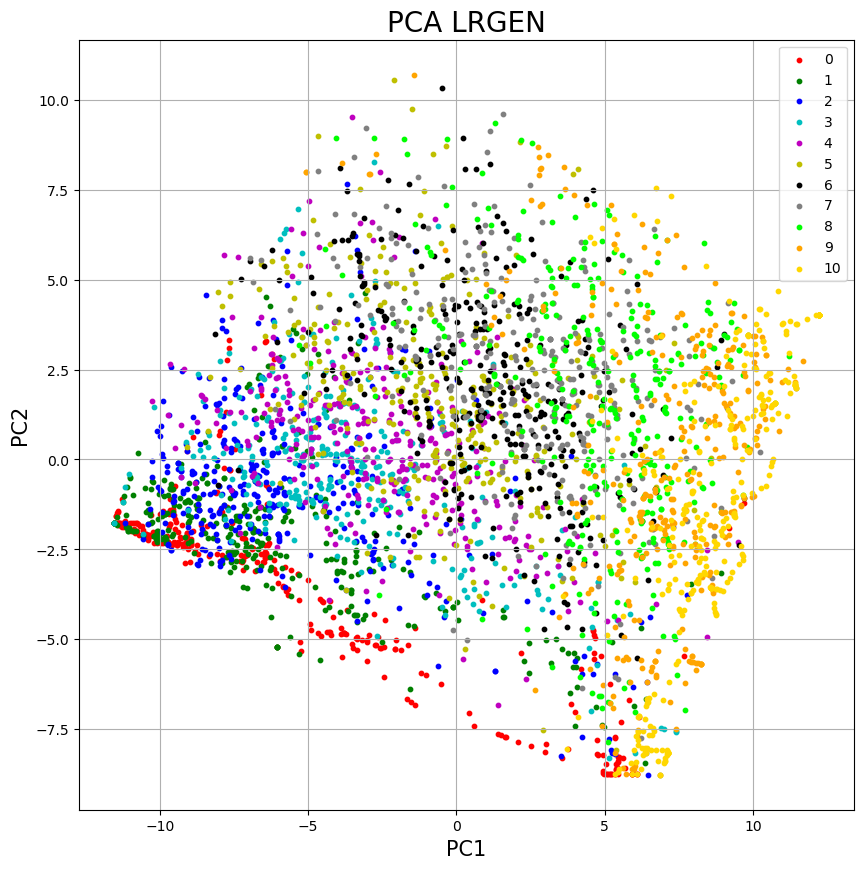

In [13]:
# visualize the results of the PCA
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA LRGEN', fontsize = 20)

targets = range(0,12)
colors = ['r', 'g', 'b', 'c',  'm',  'y',  'k',  'gray',  'lime',  'orange',  'gold']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[target_factor] == target #indicesToKeep = finalDf[target_factor].factorize()[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()
#plt.savefig('pics/PCA_LRGEN_FULL.png', dpi=600)

In [14]:
# about 80% of the variance are explained through the 2 components
pca.explained_variance_ratio_

array([0.64066875, 0.20428091])

In [15]:
print(pca.components_)
print(pca.feature_names_in_)

[[ 0.25455593  0.37596811  0.28246516  0.48035206  0.48335883  0.49968874]
 [ 0.68104426 -0.0038865   0.59821128 -0.22196154 -0.14478697 -0.32875018]]
['econ_interven' 'environment' 'redistribution' 'civlib_laworder'
 'immigrate_policy' 'sociallifestyle']


# Clustering
Check if some patterns can be observed using unsupervised learning

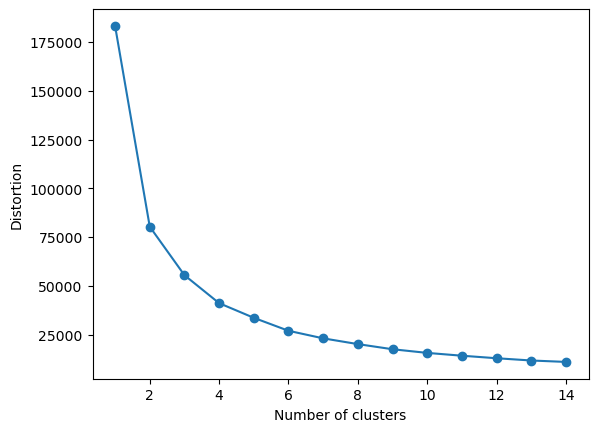

In [16]:
# try to obtain best number of clusters through scree plot
distortions = []
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(finalDf[['PC1', 'PC2']])
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [17]:
# try to cluster results of PCA
km = KMeans(
    n_clusters=11, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(finalDf[['PC1', 'PC2']])

In [18]:
y_km

array([ 7,  4,  9, ..., 10,  2,  2], dtype=int32)

In [19]:
cluster_data = pd.concat([finalDf, 
                          pd.DataFrame(y_km, 
                                       index=X_train.index, 
                                       columns=['cluster'])], 
                         axis=1)

In [20]:
cluster_data.head(20)
#cluster_data[cluster_data['lrgen_factor']==10]['cluster'].value_counts()

,PC1,PC2,lrgen_factor,cluster
0,0.283773,8.075159,6.0,7
1,4.547388,0.986341,8.0,4
2,0.212771,-5.539393,4.0,9
3,9.453462,3.637143,8.0,6
4,3.773338,2.270506,5.0,4
5,-6.357176,-0.779352,0.0,8
6,7.083827,-0.767305,8.0,2
7,3.186563,4.815019,8.0,4
8,3.330089,2.853696,7.0,4
9,-4.092241,-2.342368,4.0,9


In [21]:
cluster_data.pivot_table(aggfunc='count', columns = [target_factor, 'cluster']).T

PC1  PC2
lrgen_factor cluster          
0.0          0          9    9
             1          1    1
             2          2    2
             5        145  145
             8         71   71
...                   ...  ...
10.0         1          4    4
             2        133  133
             4         15   15
             6        128  128
             10        68   68

[93 rows x 2 columns]

# Non-negative matrix Factorization
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF

In [22]:
# create a NMF with 2 components
# combine the result with the target result
nmf = NMF(n_components=2, random_state = 36, max_iter=1000)
nmf_matrices = nmf.fit_transform(X_train)
nmfDf = pd.DataFrame(data = nmf_matrices,
                           columns = ['PC1', 
                                        'PC2'],
                          index=X_train.index
                    )
finalnmfDf = pd.concat([nmfDf, y_train], axis = 1)

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [23]:
finalnmfDf

,PC1,PC2,lrgen_factor
0,0.133051,0.566954,6.0
1,0.436305,0.342543,8.0
2,0.457203,0.019332,4.0
3,0.525374,0.518716,8.0
4,0.381083,0.384898,5.0
...,...,...,...
3823,0.542971,0.541938,10.0
3824,0.746164,0.022710,10.0
3825,0.706787,0.021157,10.0
3826,0.554839,0.348396,10.0


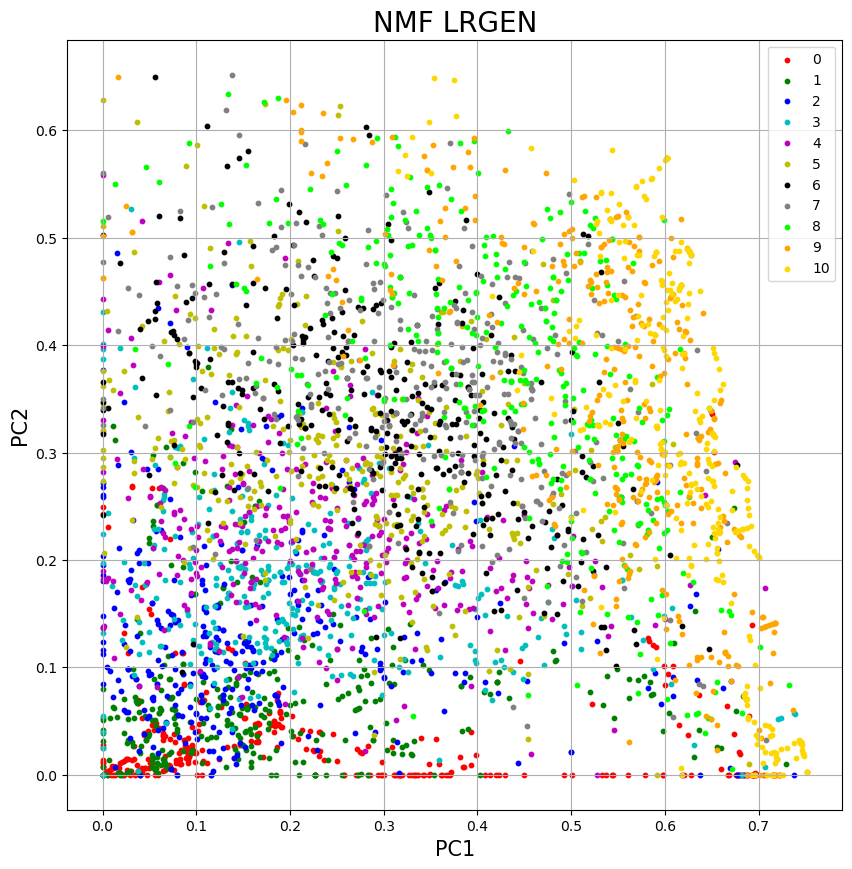

In [24]:
# visualize the results of the NMF
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('NMF LRGEN', fontsize = 20)

targets = range(0,12)
colors = ['r', 'g', 'b', 'c',  'm',  'y',  'k',  'gray',  'lime',  'orange',  'gold']
for target, color in zip(targets,colors):
    indicesToKeep = finalnmfDf[target_factor] == target #indicesToKeep = finalDf[target_factor].factorize()[0] == target
    ax.scatter(finalnmfDf.loc[indicesToKeep, 'PC1']
               , finalnmfDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()
#plt.savefig('pics/PCA_LRGEN_FULL.png', dpi=600)

In [25]:
# create a NMF with 3 components
# combine the result with the target result
nmf = NMF(n_components=3, random_state = 36, max_iter=1000)
nmf_matrices = nmf.fit_transform(X_train)
nmfDf = pd.DataFrame(data = nmf_matrices,
                           columns = ['PC1', 
                                        'PC2', 'PC3']#,
                          #index=X_train.index
                    )
finalnmfDf = pd.concat([nmfDf, y_train], axis = 1)

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [26]:
clf = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, finalnmfDf[['PC1', 'PC2', 'PC3']], np.ravel(finalnmfDf['lrgen_factor']), cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.36292428 0.33028721 0.34986945 0.34509804 0.36732026]
0.35 accuracy with a standard deviation of 0.01


In [27]:
scoring_method = 'balanced_accuracy'#['balanced_accuracy', 'f1_samples', 'roc_auc_ovo_weighted']
cv_nr = 5
pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))
# Create the parameter grid
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear'],
                    'svc__degree': [1,2,3,4,5]
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]
# Create an instance of GridSearch Cross-validation estimator
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring=scoring_method,
                     cv=cv_nr,
                     refit=True,
                     n_jobs=1)
# Train the SVM classifier
gsSVC.fit(finalnmfDf[['PC1', 'PC2', 'PC3']], np.ravel(finalnmfDf['lrgen_factor']))
# Print the training score of the best model
print(gsSVC.best_score_)
# Print the model parameters of the best model
print(gsSVC.best_params_)
# Print the model score on the test data using GridSearchCV score method
print('Test accuracy: %.3f' % gsSVC.score(nmf.transform(X_test), y_test))
# Print the model score on the test data using Best estimator instance
clfSVCnmf = gsSVC.best_estimator_
#print('Test accuracy: %.3f' % clfSVC.score(X_test, y_test))

0.48903444381705247
{'svc__C': 1.0, 'svc__gamma': 10.0, 'svc__kernel': 'rbf'}
Test accuracy: 0.395


/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Supervised learning: various algorithms
### Sources: https://vitalflux.com/grid-search-explained-python-sklearn-examples/

## 1) Support Vector Classification

CHECK: RMSE and other scoring mechanisms

In [28]:
########### PARAMETERS 
scoring_method = 'balanced_accuracy'#['balanced_accuracy', 'f1_samples', 'roc_auc_ovo_weighted']
cv_nr = 5

In [29]:
# CROSS-VALIDATION (without TEST dataset)

clf = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X_train, np.ravel(y_train), cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.39164491 0.41253264 0.40339426 0.4        0.43137255]
0.41 accuracy with a standard deviation of 0.01


In [30]:
pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))
# Create the parameter grid
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear'],
                    'svc__degree': [1,2,3,4,5]
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]
# Create an instance of GridSearch Cross-validation estimator
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring=scoring_method,
                     cv=cv_nr,
                     refit=True,
                     n_jobs=1)
# Train the SVM classifier
gsSVC.fit(finalnmfDf[['PC1', 'PC2', 'PC3']], np.ravel(finalnmfDf['lrgen_factor']))
# Print the training score of the best model
print(gsSVC.best_score_)
# Print the model parameters of the best model
print(gsSVC.best_params_)
# Print the model score on the test data using GridSearchCV score method
print('Test accuracy: %.3f' % gsSVC.score(nmf.transform(X_test), y_test))
# Print the model score on the test data using Best estimator instance
clfSVC = gsSVC.best_estimator_
#print('Test accuracy: %.3f' % clfSVC.score(X_test, y_test))

0.48903444381705247
{'svc__C': 1.0, 'svc__gamma': 10.0, 'svc__kernel': 'rbf'}
Test accuracy: 0.395


/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Random Forest Classification

In [31]:
pipelineRFC = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1, criterion='entropy')) 
# Create the parameter grid
                            
param_grid_rfc = [{
    'randomforestclassifier__max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],
    'randomforestclassifier__max_features':[2, 3, 4, 5, 6],
    'randomforestclassifier__n_estimators':range(5, 105, 5)#,
    #'randomforestclassifier__criterion:':['gini', 'entropy']
}]
# Create an instance of GridSearch Cross-validation estimator
gsRFC = GridSearchCV(estimator=pipelineRFC,
                     param_grid = param_grid_rfc,
                     scoring=scoring_method,
                     cv=cv_nr,
                     refit=True,
                     n_jobs=1)
# Train the RandomForestClassifier
gsRFC = gsRFC.fit(finalnmfDf[['PC1', 'PC2', 'PC3']], np.ravel(finalnmfDf['lrgen_factor']))
# Print the training score of the best model
print(gsRFC.best_score_)
# Print the model parameters of the best model
print(gsRFC.best_params_)
# Print the test score of the best model
clfRFC = gsRFC.best_estimator_
print('Test accuracy: %.3f' % clfRFC.score(nmf.transform(X_test), y_test))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2700 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
 

0.4982006399397704
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__n_estimators': 90}
Test accuracy: 0.398


/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## Logistic Regression Classification

In [33]:
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
# Create the parameter grid
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]
# Create an instance of GridSearch Cross-validation estimator
gsLR = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring=scoring_method,
                     cv=cv_nr,
                     refit=True,
                     n_jobs=1)
# Train the LogisticRegression Classifier
gsLR = gsLR.fit(finalnmfDf[['PC1', 'PC2', 'PC3']], np.ravel(finalnmfDf['lrgen_factor']))
# Print the training score of the best model
print(gsLR.best_score_)
# Print the model parameters of the best model
print(gsLR.best_params_)
# Print the test score of the best model
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(nmf.transform(X_test), y_test))

0.40724637681159426
{'logisticregression__C': 10.0}
Test accuracy: 0.349


/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## ADABoost Classification (Ensemble Method)

In [34]:
pipelineADAB = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))
# Create the parameter grid
param_grid_ADAB = [{
    'adaboostclassifier__n_estimators': [2, 10, 20, 30, 40, 50, 100]
}]
# Create an instance of GridSearch Cross-validation estimator
gsADAB = GridSearchCV(estimator=pipelineADAB,
                     param_grid = param_grid_ADAB,
                     scoring=scoring_method,
                     cv=cv_nr,
                     refit=True,
                     n_jobs=1)
# Train the LogisticRegression Classifier
gsADAB = gsADAB.fit(finalnmfDf[['PC1', 'PC2', 'PC3']], np.ravel(finalnmfDf['lrgen_factor']))
# Print the training score of the best model
print(gsADAB.best_score_)
# Print the model parameters of the best model
print(gsADAB.best_params_)
# Print the test score of the best model
clfADAB = gsADAB.best_estimator_
print('Test accuracy: %.3f' % clfADAB.score(nmf.transform(X_test), y_test))

0.32295125164690386
{'adaboostclassifier__n_estimators': 20}
Test accuracy: 0.343


/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
gsADAB.scoring

'balanced_accuracy'

# Test models with independent dataset

In [36]:
#scaler = preprocessing.StandardScaler().fit(test_X)
#test_X_scaled = scaler.transform(test_X)

In [38]:
sklearn.metrics.accuracy_score(test_y, gsADAB.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.34256055363321797

In [39]:
sklearn.metrics.confusion_matrix(test_y, gsADAB.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 10,  3,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  4,  7,  0,  1,  2,  0,  1,  0,  0],
       [ 1,  4,  2,  6,  3,  1,  5,  0,  0,  0,  0],
       [ 1,  0,  1,  5, 13,  7,  7,  0,  1,  0,  0],
       [ 0,  1,  0,  2,  7, 21,  8,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  6, 16, 12,  2,  1,  1,  0],
       [ 0,  0,  0,  0,  3,  8, 16,  1,  6,  2,  1],
       [ 0,  0,  0,  0,  0,  1, 10,  3, 12,  5,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  8,  9,  1],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  0,  4,  6]])

In [40]:
sklearn.metrics.mean_squared_error(test_y, gsADAB.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2.2595155709342563

In [41]:
sklearn.metrics.f1_score(test_y, gsADAB.predict(nmf.transform(test_X)), average='weighted')

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.32076633198079285

In [42]:
sklearn.metrics.accuracy_score(test_y, gsLR.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.3494809688581315

In [43]:
sklearn.metrics.confusion_matrix(test_y, gsLR.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  8,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  9, 13,  5,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  1,  8,  6,  2,  3,  1,  0,  0,  0,  0],
       [ 1,  1,  2, 10, 11,  4,  3,  0,  2,  1,  0],
       [ 0,  0,  0,  5,  9, 16,  4,  3,  2,  1,  0],
       [ 0,  0,  0,  1,  5, 11,  9,  7,  5,  0,  0],
       [ 0,  0,  0,  0,  1,  4,  6,  9, 13,  3,  1],
       [ 0,  0,  0,  0,  0,  1,  1, 10,  9,  8,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  8,  9],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  3,  7]])

In [44]:
sklearn.metrics.mean_squared_error(test_y, gsLR.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2.152249134948097

In [45]:
sklearn.metrics.f1_score(test_y, gsLR.predict(nmf.transform(test_X)), average='weighted')

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.3447308091125255

In [46]:
sklearn.metrics.accuracy_score(test_y, gsRFC.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.39792387543252594

In [47]:
sklearn.metrics.confusion_matrix(test_y, gsRFC.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  9,  3,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  9, 12,  6,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  6,  8,  1,  3,  2,  0,  0,  0,  0],
       [ 1,  1,  4,  7, 12,  4,  2,  4,  0,  0,  0],
       [ 0,  0,  0,  3, 10, 14,  7,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  7, 11,  8,  9,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  2,  3, 21,  6,  2,  0],
       [ 0,  0,  0,  0,  0,  1,  2,  8, 12,  7,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  6,  3],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  3,  8]])

In [48]:
sklearn.metrics.mean_squared_error(test_y, gsRFC.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2.055363321799308

In [49]:
sklearn.metrics.f1_score(test_y, gsRFC.predict(nmf.transform(test_X)), average='weighted')

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.39044223908738057

In [50]:
sklearn.metrics.accuracy_score(test_y, gsSVC.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.3391003460207612

In [51]:
sklearn.metrics.confusion_matrix(test_y, gsSVC.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  7,  5,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8, 13,  8,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  8,  4,  2,  3,  2,  1,  0,  0,  0],
       [ 0,  2,  3,  6, 12,  3,  3,  3,  3,  0,  0],
       [ 0,  1,  0,  2, 11, 12,  7,  6,  1,  0,  0],
       [ 0,  0,  0,  0,  8, 12,  9,  6,  3,  0,  0],
       [ 0,  0,  0,  1,  3,  2,  4, 14,  9,  4,  0],
       [ 0,  0,  0,  0,  0,  2,  4,  9,  7,  9,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  3,  8]])

In [52]:
sklearn.metrics.mean_squared_error(test_y, gsSVC.predict(nmf.transform(test_X)))

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1.8166089965397925

In [53]:
sklearn.metrics.f1_score(test_y, gsSVC.predict(nmf.transform(test_X)), average='weighted')

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.33622342849166287

In [54]:
#pipeline = Pipeline(steps=[("preprocesser", preprocessor), ("classifier", LogisticRegression())])
#pipeline.fit(X_train, y_train)

In [55]:
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [56]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
#pipe.fit(X_train, y_train)
#Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
#pipe.score(X_test, y_test)

In [75]:
### Write several scores to the output ###

RMSE = True
model_vector = [gsADAB, gsLR, gsRFC, gsSVC]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(nmf.transform(test_X))))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(nmf.transform(test_X))))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(nmf.transform(test_X))))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(nmf.transform(test_X)), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sklearn.metrics.mean_squared_error(test_y, model.predict(nmf.transform(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(nmf.transform(test_X))))
    print(confusion_matrix_relaxed(sklearn.metrics.confusion_matrix(test_y, model.predict(nmf.transform(test_X)))))    
    print(confusion_matrix_perc(sklearn.metrics.confusion_matrix(test_y, model.predict(nmf.transform(test_X)))))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(nmf.transform(test_X))))

{'standardscaler': StandardScaler(), 'adaboostclassifier': AdaBoostClassifier(random_state=1)}
Accuracy Score:  0.34256055363321797
Balanced Accuracy Score:  0.4109368798364013
Cohen-Kappa-Score:  0.2650345999919691
F1-Score:  0.32076633198079285
RMSE:  2.2595155709342563
__________________________________

{'standardscaler': StandardScaler(), 'logisticregression': LogisticRegression(random_state=1)}
Accuracy Score:  0.3494809688581315
Balanced Accuracy Score:  0.4188291150312681
Cohen-Kappa-Score:  0.2785361448982844
F1-Score:  0.3447308091125255
RMSE:  2.152249134948097
__________________________________

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.39792387543252594
Balanced Accuracy Score:  0.4605207037025219
Cohen-Kappa-Score:  0.3285351849379089
F1-Score:  0.39044223908738057


/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/b

RMSE:  2.055363321799308
__________________________________

{'standardscaler': StandardScaler(), 'svc': SVC(random_state=1)}
Accuracy Score:  0.3391003460207612
Balanced Accuracy Score:  0.3952835902297625


/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Cohen-Kappa-Score:  0.2629421425805505
F1-Score:  0.33622342849166287
RMSE:  1.8166089965397925
__________________________________

Confusion matrix: 
 [[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 3 10  3  3  0  0  0  0  0  0  0]
 [ 0 15  4  7  0  1  2  0  1  0  0]
 [ 1  4  2  6  3  1  5  0  0  0  0]
 [ 1  0  1  5 13  7  7  0  1  0  0]
 [ 0  1  0  2  7 21  8  0  1  0  0]
 [ 0  0  0  0  6 16 12  2  1  1  0]
 [ 0  0  0  0  3  8 16  1  6  2  1]
 [ 0  0  0  0  0  1 10  3 12  5  1]
 [ 0  0  0  0  0  0  1  0  8  9  1]
 [ 0  1  0  0  0  0  1  0  0  4  6]]
0.4186851211072664
0.34256055363321797
Confusion matrix: 
 [[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 6  8  5  0  0  0  0  0  0  0  0]
 [ 2  9 13  5  0  0  0  0  0  1  0]
 [ 1  1  8  6  2  3  1  0  0  0  0]
 [ 1  1  2 10 11  4  3  0  2  1  0]
 [ 0  0  0  5  9 16  4  3  2  1  0]
 [ 0  0  0  1  5 11  9  7  5  0  0]
 [ 0  0  0  0  1  4  6  9 13  3  1]
 [ 0  0  0  0  0  1  1 10  9  8  3]
 [ 0  0  0  0  0  0  0  1  1  8  9]
 [ 1  0  0  0  0  0  0  1  0  3 

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/b

0.44982698961937717
0.3494809688581315
Confusion matrix: 
 [[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 4  9  3  2  0  0  0  0  0  1  0]
 [ 0  9 12  6  2  0  0  0  0  1  0]
 [ 0  2  6  8  1  3  2  0  0  0  0]
 [ 1  1  4  7 12  4  2  4  0  0  0]
 [ 0  0  0  3 10 14  7  6  0  0  0]
 [ 0  0  0  0  7 11  8  9  3  0  0]
 [ 0  0  0  0  3  2  3 21  6  2  0]
 [ 0  0  0  0  0  1  2  8 12  7  2]
 [ 0  0  0  0  0  0  0  0 10  6  3]
 [ 0  1  0  0  0  0  0  0  0  3  8]]
0.40484429065743943
0.39792387543252594
Confusion matrix: 
 [[ 4  1  0  0  0  0  0  0  0  0  0]
 [ 5  7  5  2  0  0  0  0  0  0  0]
 [ 0  8 13  8  1  0  0  0  0  0  0]
 [ 1  1  8  4  2  3  2  1  0  0  0]
 [ 0  2  3  6 12  3  3  3  3  0  0]
 [ 0  1  0  2 11 12  7  6  1  0  0]
 [ 0  0  0  0  8 12  9  6  3  0  0]
 [ 0  0  0  1  3  2  4 14  9  4  0]
 [ 0  0  0  0  0  2  4  9  7  9  1]
 [ 0  0  0  0  0  0  0  0  8  8  3]
 [ 0  0  0  0  0  0  0  0  1  3  8]]
0.43944636678200694
0.3391003460207612
              precision    recall  f1-score   su

/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/gernot/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.40      0.80      0.53         5
         1.0       0.35      0.37      0.36        19
         2.0       0.45      0.43      0.44        30
         3.0       0.17      0.18      0.18        22
         4.0       0.32      0.34      0.33        35
         5.0       0.35      0.30      0.32        40
         6.0       0.31      0.24      0.27        38
         7.0       0.36      0.38      0.37        37
         8.0       0.22      0.22      0.22        32
         9.0       0.33      0.42      0.37        19
        10.0       0.67      0.67      0.67        12

    accuracy                           0.34       289
   macro avg       0.36      0.40      0.37       289
weighted avg       0.34      0.34      0.34       289



In [58]:
print('Features:           ', gsRFC.feature_names_in_)
print('Feature Importance: ', gsRFC.best_estimator_[1].feature_importances_)

Features:            ['PC1' 'PC2' 'PC3']
Feature Importance:  [0.33956419 0.45369261 0.2067432 ]


In [59]:
from joblib import dump, load
#dump(gsRFC, 'models/gsRFC_lrgen_fulltarget_NoImputation.joblib') 
#clf = load('filename.joblib')
